# Trabajo Final - Introducción al Aprendizaje Automático

# Grupo 4: Paul Acosta & Alejo Senra
- Predicción de la potabilidad del agua

***Link al dataset***: [https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/](https://)

**Fuente**: *Kaggle.com*



---

**Importamos librerías y recursos a utilizar en el Trabajo**

In [ ]:
#IMPORTS
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from matplotlib.patches import Patch





---

**Cargamos dataset en el entorno y guardamos en una variable**

In [ ]:
df = pd.read_csv('/content/water_potability.csv') #Data frame original


dfp = pd.read_csv('/content/water_potability.csv') #Data frame para modificar y hacer pruebas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



## 1) **Exploración de datos**
- Luego de estudiar un poco el dataset, conocer sus variables y propiedades;
nos adentramos en su exploración para buscar patrones y relaciones que permitan realizar nuestra predicción




In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
#Conversión booleana al target
for i, target in enumerate(dfp['Potability']):
    if target == 0:
      dfp['Potability'][i] = False
    else:
      dfp['Potability'][i] = True



<ipython-input-4-c9a8b8f13a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Potability'][i] = False
<ipython-input-4-c9a8b8f13a8f>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfp['Potability'][i] = False


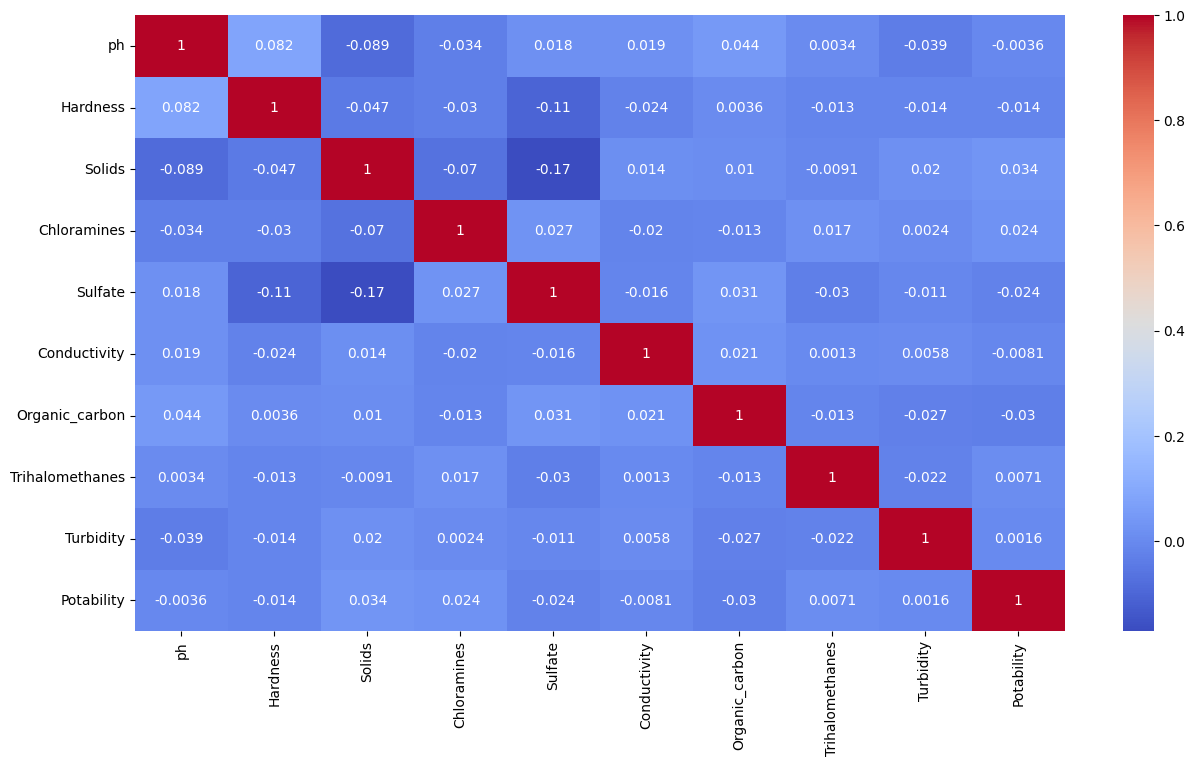

In [ ]:
#Primera exploración --> Scatter plots para encontrar primeros patrones

plt.figure(figsize =(15,8))
sns.heatmap(df.corr(),annot =True,cmap = 'coolwarm')
plt.show()

#sns.pairplot(dfp, hue='Potability')


<ipython-input-6-e1b566b4e33c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percentages.index, y=class_percentages.values, palette=["#007acc", "orange"])


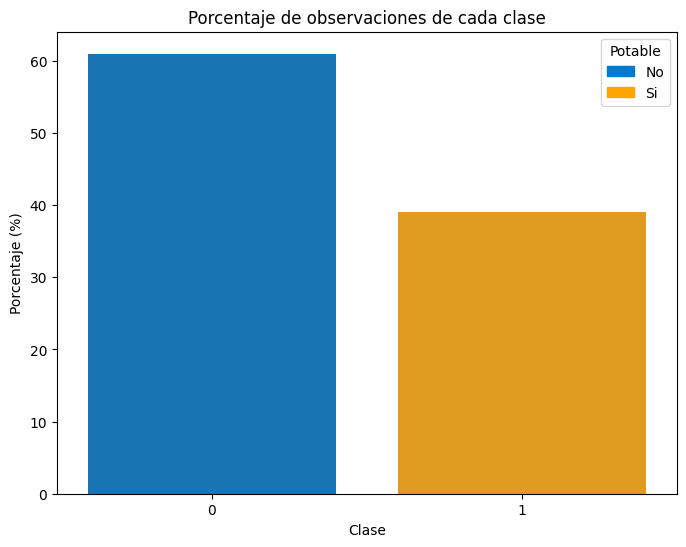

In [ ]:
#Grafico de barras, para mostrar la distribucion del target

barras=df['Potability']

class_percentages = df['Potability'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette=["#007acc", "orange"])

plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de observaciones de cada clase')
legend_patches = [Patch(color="#007acc", label='No'), Patch(color="orange", label='Si')]
plt.legend(handles=legend_patches, title='Potable')

plt.show()


In [ ]:
clases_count = df['Potability'].value_counts()
print(clases_count) #Cantidad exacta de observaciones por clase


Potability
0    1998
1    1278
Name: count, dtype: int64


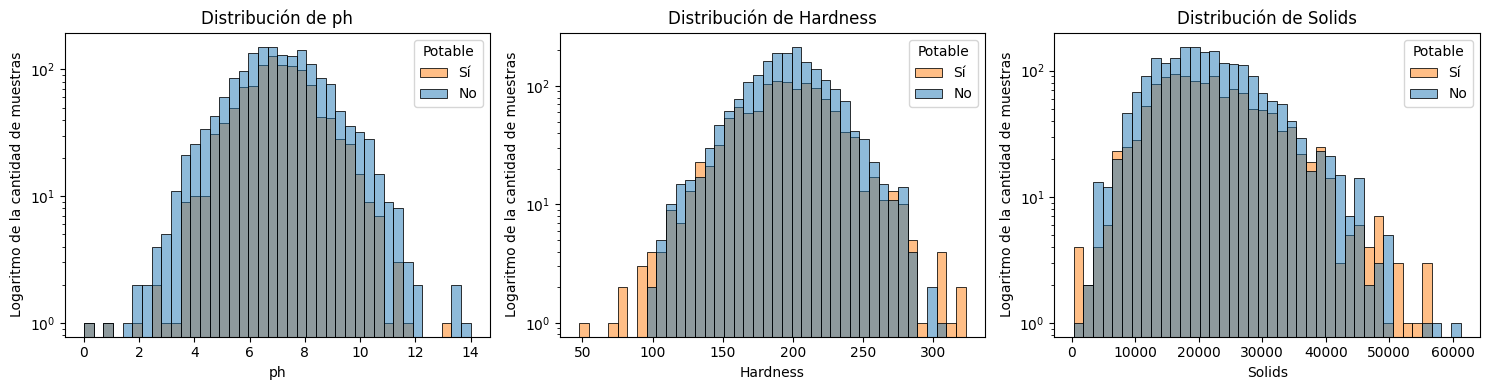

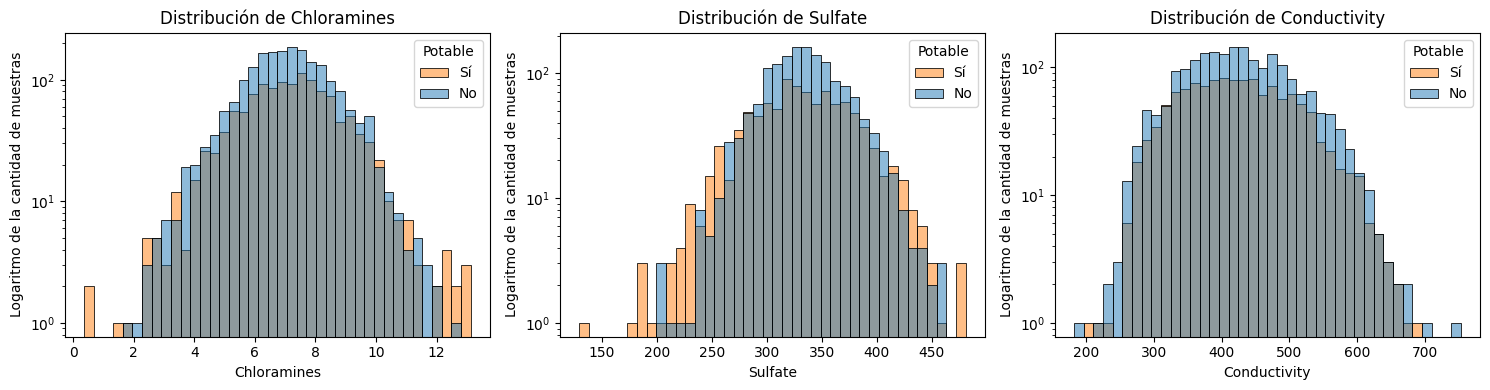

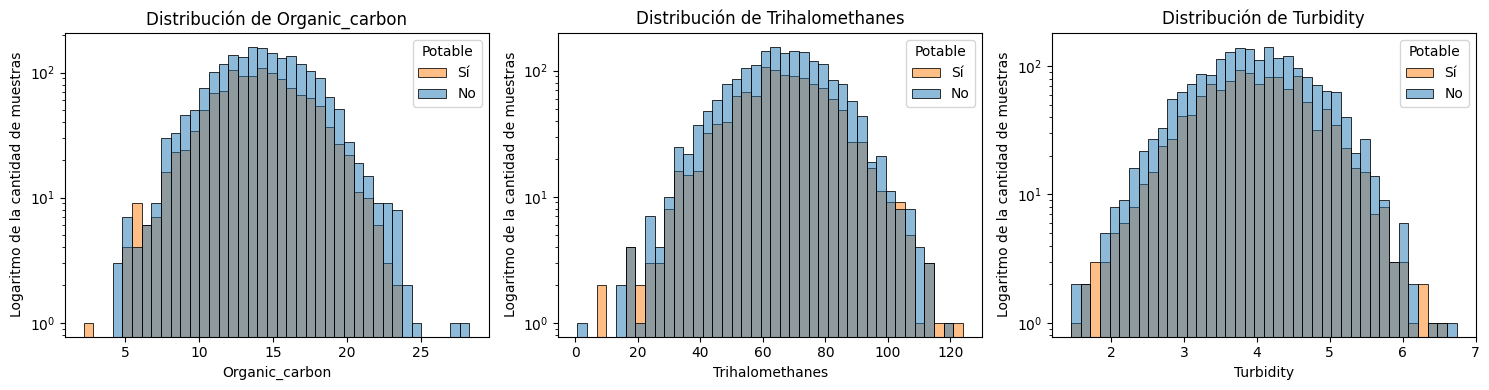

In [ ]:
#Distribucion en df original
columns = df.columns.drop('Potability')

for i in range(0, len(columns), 3):

    col1 = columns[i]
    col2 = columns[i + 1] if i + 1 < len(columns) else None
    col3 = columns[i + 2] if i + 2 < len(columns) else None


    plt.figure(figsize=(15, 4))


    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=col1, kde=False, hue='Potability', bins=40)
    plt.yscale("log")
    plt.title(f'Distribución de {col1}')
    plt.legend(title='Potable', labels=['Sí', 'No'])
    plt.ylabel('Logaritmo de la cantidad de muestras')


    if col2:
        plt.subplot(1, 3, 2)
        sns.histplot(data=df, x=col2, kde=False, hue='Potability', bins=40)
        plt.yscale("log")
        plt.title(f'Distribución de {col2}')
        plt.legend(title='Potable', labels=['Sí', 'No'])
        plt.ylabel('Logaritmo de la cantidad de muestras')


    if col3:
        plt.subplot(1, 3, 3)
        sns.histplot(data=df, x=col3, kde=False, hue='Potability', bins=40)
        plt.yscale("log")
        plt.title(f'Distribución de {col3}')
        plt.legend(title='Potable', labels=['Sí', 'No'])
        plt.ylabel('Logaritmo de la cantidad de muestras')


    plt.tight_layout()
    plt.show()


<ipython-input-9-f3ba00a5d39b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp2['Potability'][i] = 'No potable'
<ipython-input-9-f3ba00a5d39b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No potable' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfp2['Potability'][i] = 'No potable'


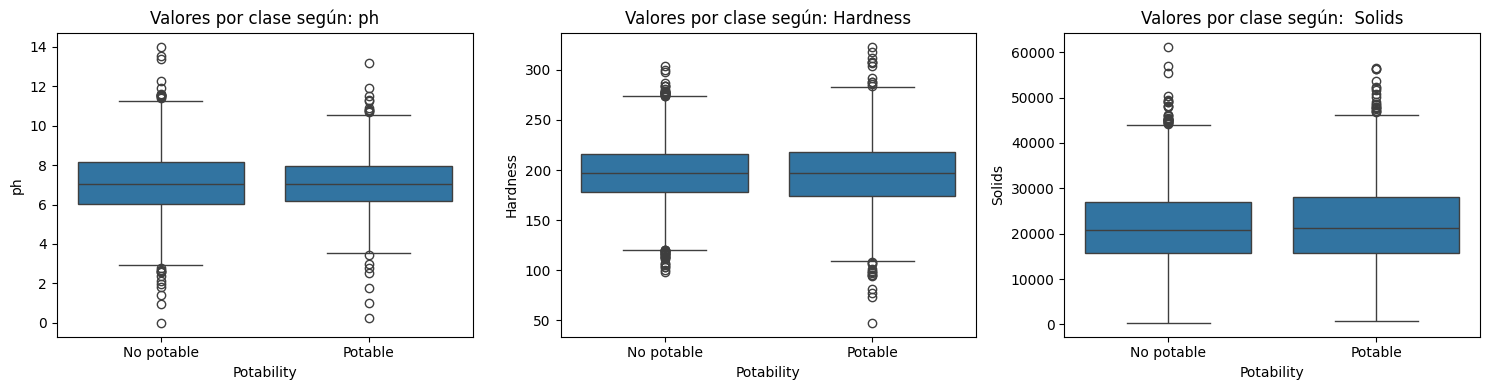

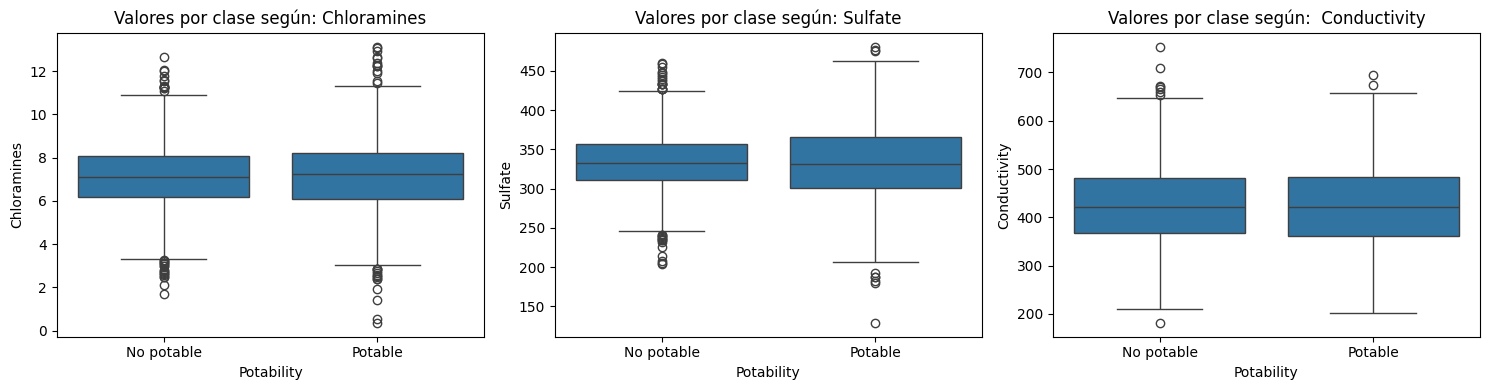

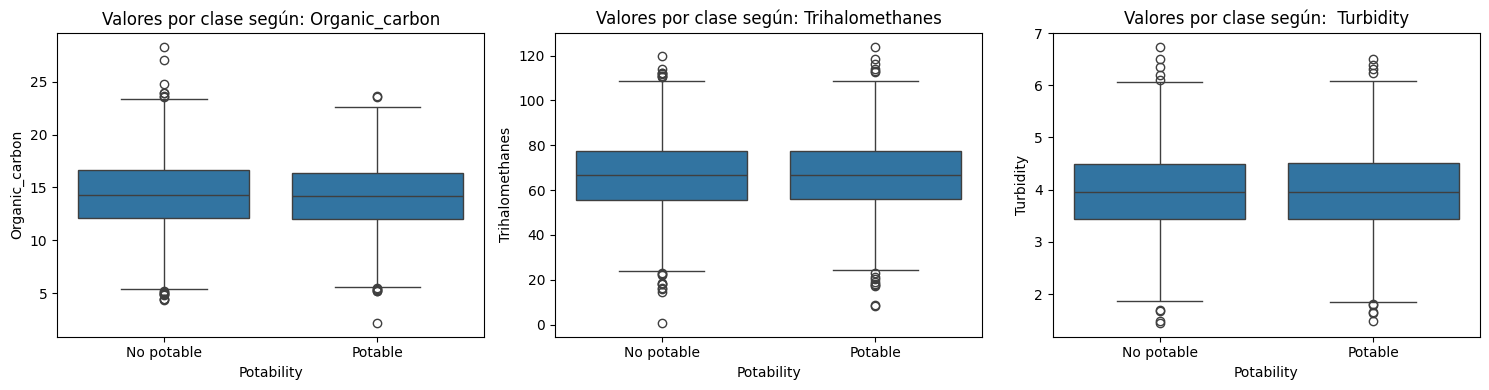

In [ ]:
#Box plots para df original, cómo se comportan las clases en cada feature. ¿Se distinguen o rondan valores parecidos?


### --------------------------------------------------------- ###
#PARA FINES ILUSTRATIVOS:
dfp2 = pd.read_csv('/content/water_potability.csv') #Data frame para modificar y hacer pruebas.
for i, target in enumerate(dfp2['Potability']):
    if target == 0:
      dfp2['Potability'][i] = 'No potable'
    else:
      dfp2['Potability'][i] = 'Potable'
### ---------------------------------------------------------- ###


Cols = [i for i in dfp2.columns if i != 'Potability']

for i in range(0, len(Cols), 3):
    col1 = Cols[i]
    col2 = Cols[i + 1] if i + 1 < len(Cols) else None
    col3 = Cols[i + 2] if i + 2 < len(Cols) else None

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    sns.boxplot(x=dfp2['Potability'], y=df[col1])
    plt.title(f'Valores por clase según: {col1}')

    if col2:
        plt.subplot(1, 3, 2)
        sns.boxplot(x=dfp2['Potability'], y=df[col2])
        plt.title(f'Valores por clase según: {col2}')

    if col3:
        plt.subplot(1, 3, 3)
        sns.boxplot(x=dfp2['Potability'], y=df[col3])
        plt.title(f'Valores por clase según:  {col3}')

    plt.tight_layout()
    plt.show()


In [ ]:
#Revisamos valores faltantes, NA y NaNs para investigar el dataset antes de seguir con nuestro trabajo
df.query('Potability==0').isna().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64



---

#                 2) **Preprocesando antes de modelar**
- Tomamos decisiones sobre datos faltantes y/o errores
- Escalamos los datos
- PCA

In [ ]:
#Imputamos NaNs en una copia del df original con la mediana

dfp.Potability.value_counts()
dfp["ph"]=dfp["ph"].fillna(dfp["ph"].median())
dfp["Sulfate"]=dfp["Sulfate"].fillna(dfp["Sulfate"].median())
dfp["Trihalomethanes"]=dfp["Trihalomethanes"].fillna(dfp["Trihalomethanes"].median())

dfp.isna().sum() #chequeo de éxito en la imputación

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Separamos dfp en X e Y:

y = dfp['Potability'] # y guarda los targets
X = dfp.drop('Potability', axis=1) # "Elimino" el target para usar lo demás como X -> axis 1 indica que elimino columna y no fila.


In [ ]:
#df.describe()
dfp.describe()
#dfp

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786  
std       80.824064        3.308162        15.769958     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.622485     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

In [ ]:
# Escalado de datos --> Estandarización del dataset

df_standar = pd.DataFrame(StandardScaler().fit_transform(X))

cov_matrix = df_standar.cov()

cov_matrix

#df_standar

keys2 = list(dict(dfp.drop('Potability', axis=1)).keys())
#print(keys2)
df_standar.columns=keys2
df_standar.head()
df_standar['Potability'] = dfp['Potability']
df_standar.head()



ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.025474  0.259195 -0.139471     0.112415  0.965957      1.708954   
1 -2.284717 -2.036414 -0.385987    -0.307694 -0.014799      2.062575   
2  0.697319  0.847665 -0.240047     1.360594 -0.014799     -0.094032   
3  0.845393  0.547651  0.000493     0.592008  0.644130     -0.778830   
4  1.372982 -0.464429 -0.460249    -0.363698 -0.649522     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity Potability  
0       -1.180651         1.305434  -1.286298      False  
1        0.270597        -0.639186   0.684218      False  
2        0.781117         0.000800  -1.167365      False  
3        1.255134         2.152154   0.848412      False  
4       -0.824357        -2.182297   0.138786      False

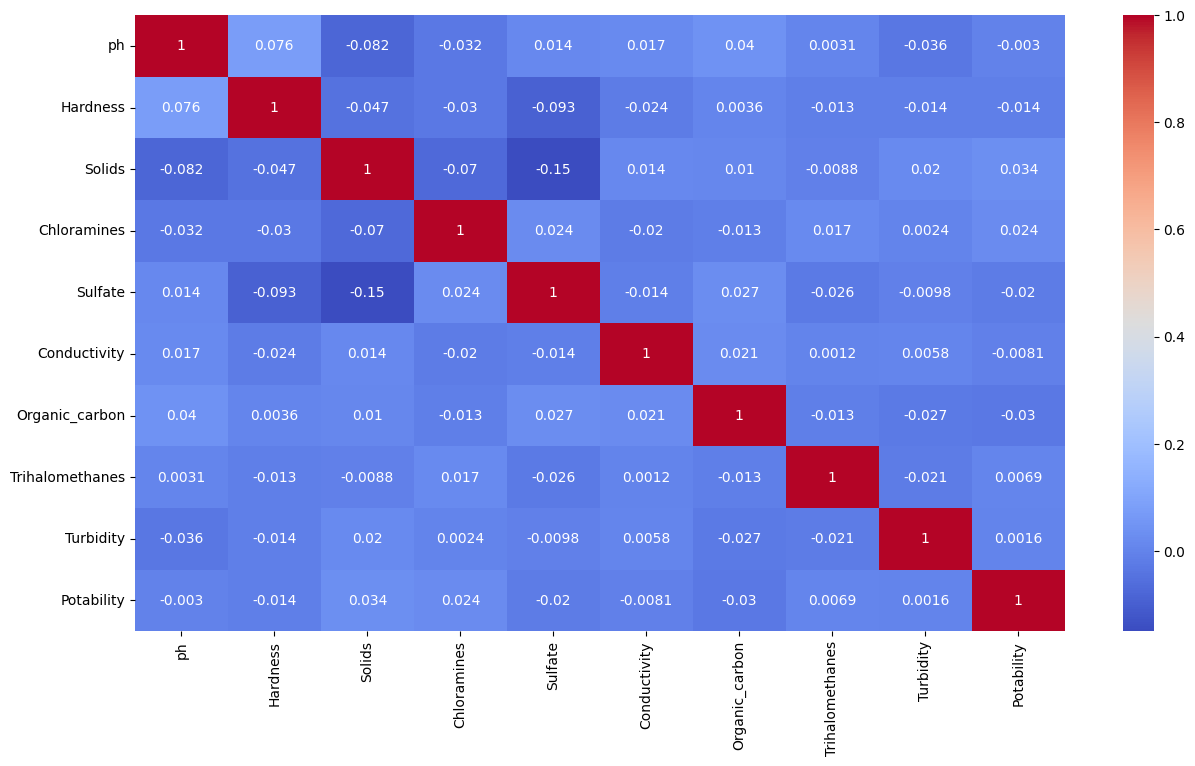

In [ ]:
#Relaciones estandarizadas, chequeamos que haya salido bien el estandarizado.

df_standar_y = pd.DataFrame(StandardScaler().fit_transform(X))

df_standar_y['target'] = y

plt.figure(figsize =(15,8))
sns.heatmap(df_standar.corr(),annot =True,cmap = 'coolwarm')
plt.show()

#sns.pairplot(df_standar_y, hue='target')

In [ ]:
# Realizamos un Análisis de componentes principales, buscando reducir la dimensionalidad del dataset para ver si esto nos ayuda a encontrar relaciones

pca = PCA()

red_dim = pca.fit_transform(df_standar)

pca_df = pd.DataFrame(red_dim)

pca_df['target'] = y

pca_df

pca_df.head()






0         1         2         3         4         5         6  \
0 -0.620475  0.012111 -0.035403  1.687479 -1.240454 -0.965218 -1.238338   
1  0.761537  2.395571 -1.883372 -0.090127 -1.095959  0.205179 -0.732938   
2 -0.996372 -0.930317  0.313455  0.732478  0.606098  1.306566 -0.562209   
3 -0.832891 -0.418986  0.472077  1.110556 -0.152153  0.638957  2.423808   
4 -0.215543 -0.605600 -0.087369 -1.837864  0.058346 -0.409191 -1.026236   

          7         8         9 target  
0 -0.677864 -1.002387 -0.395285  False  
1 -1.200172  1.317833 -0.368378  False  
2  0.203612 -0.414141 -0.388867  False  
3  0.076747 -0.827186 -0.379266  False  
4  1.585027  0.951354 -0.398132  False

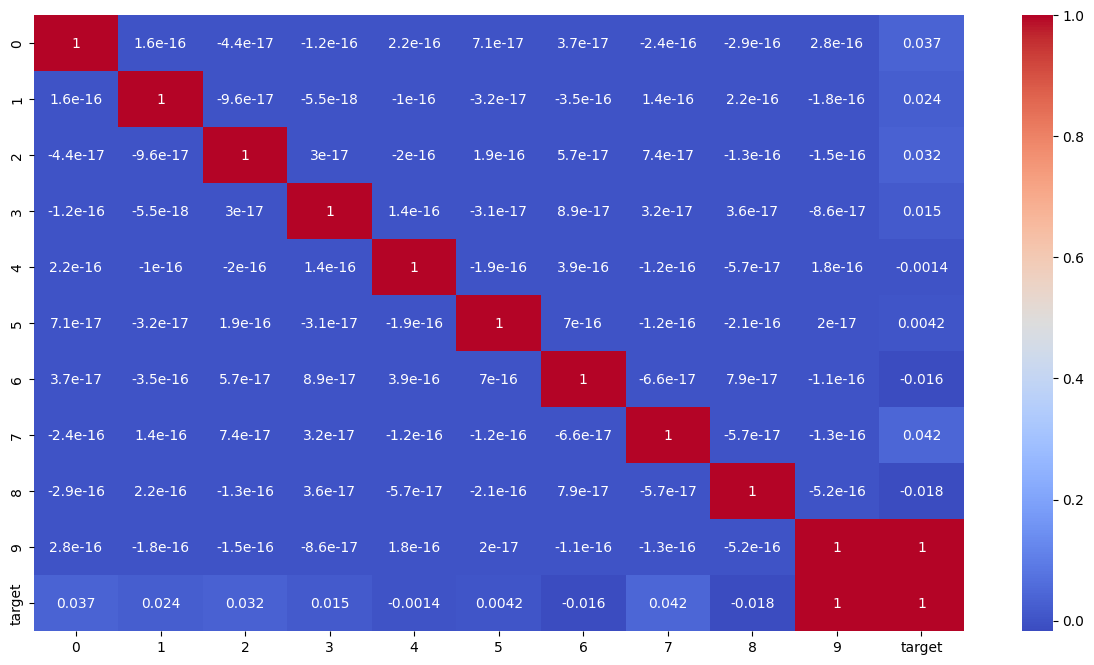

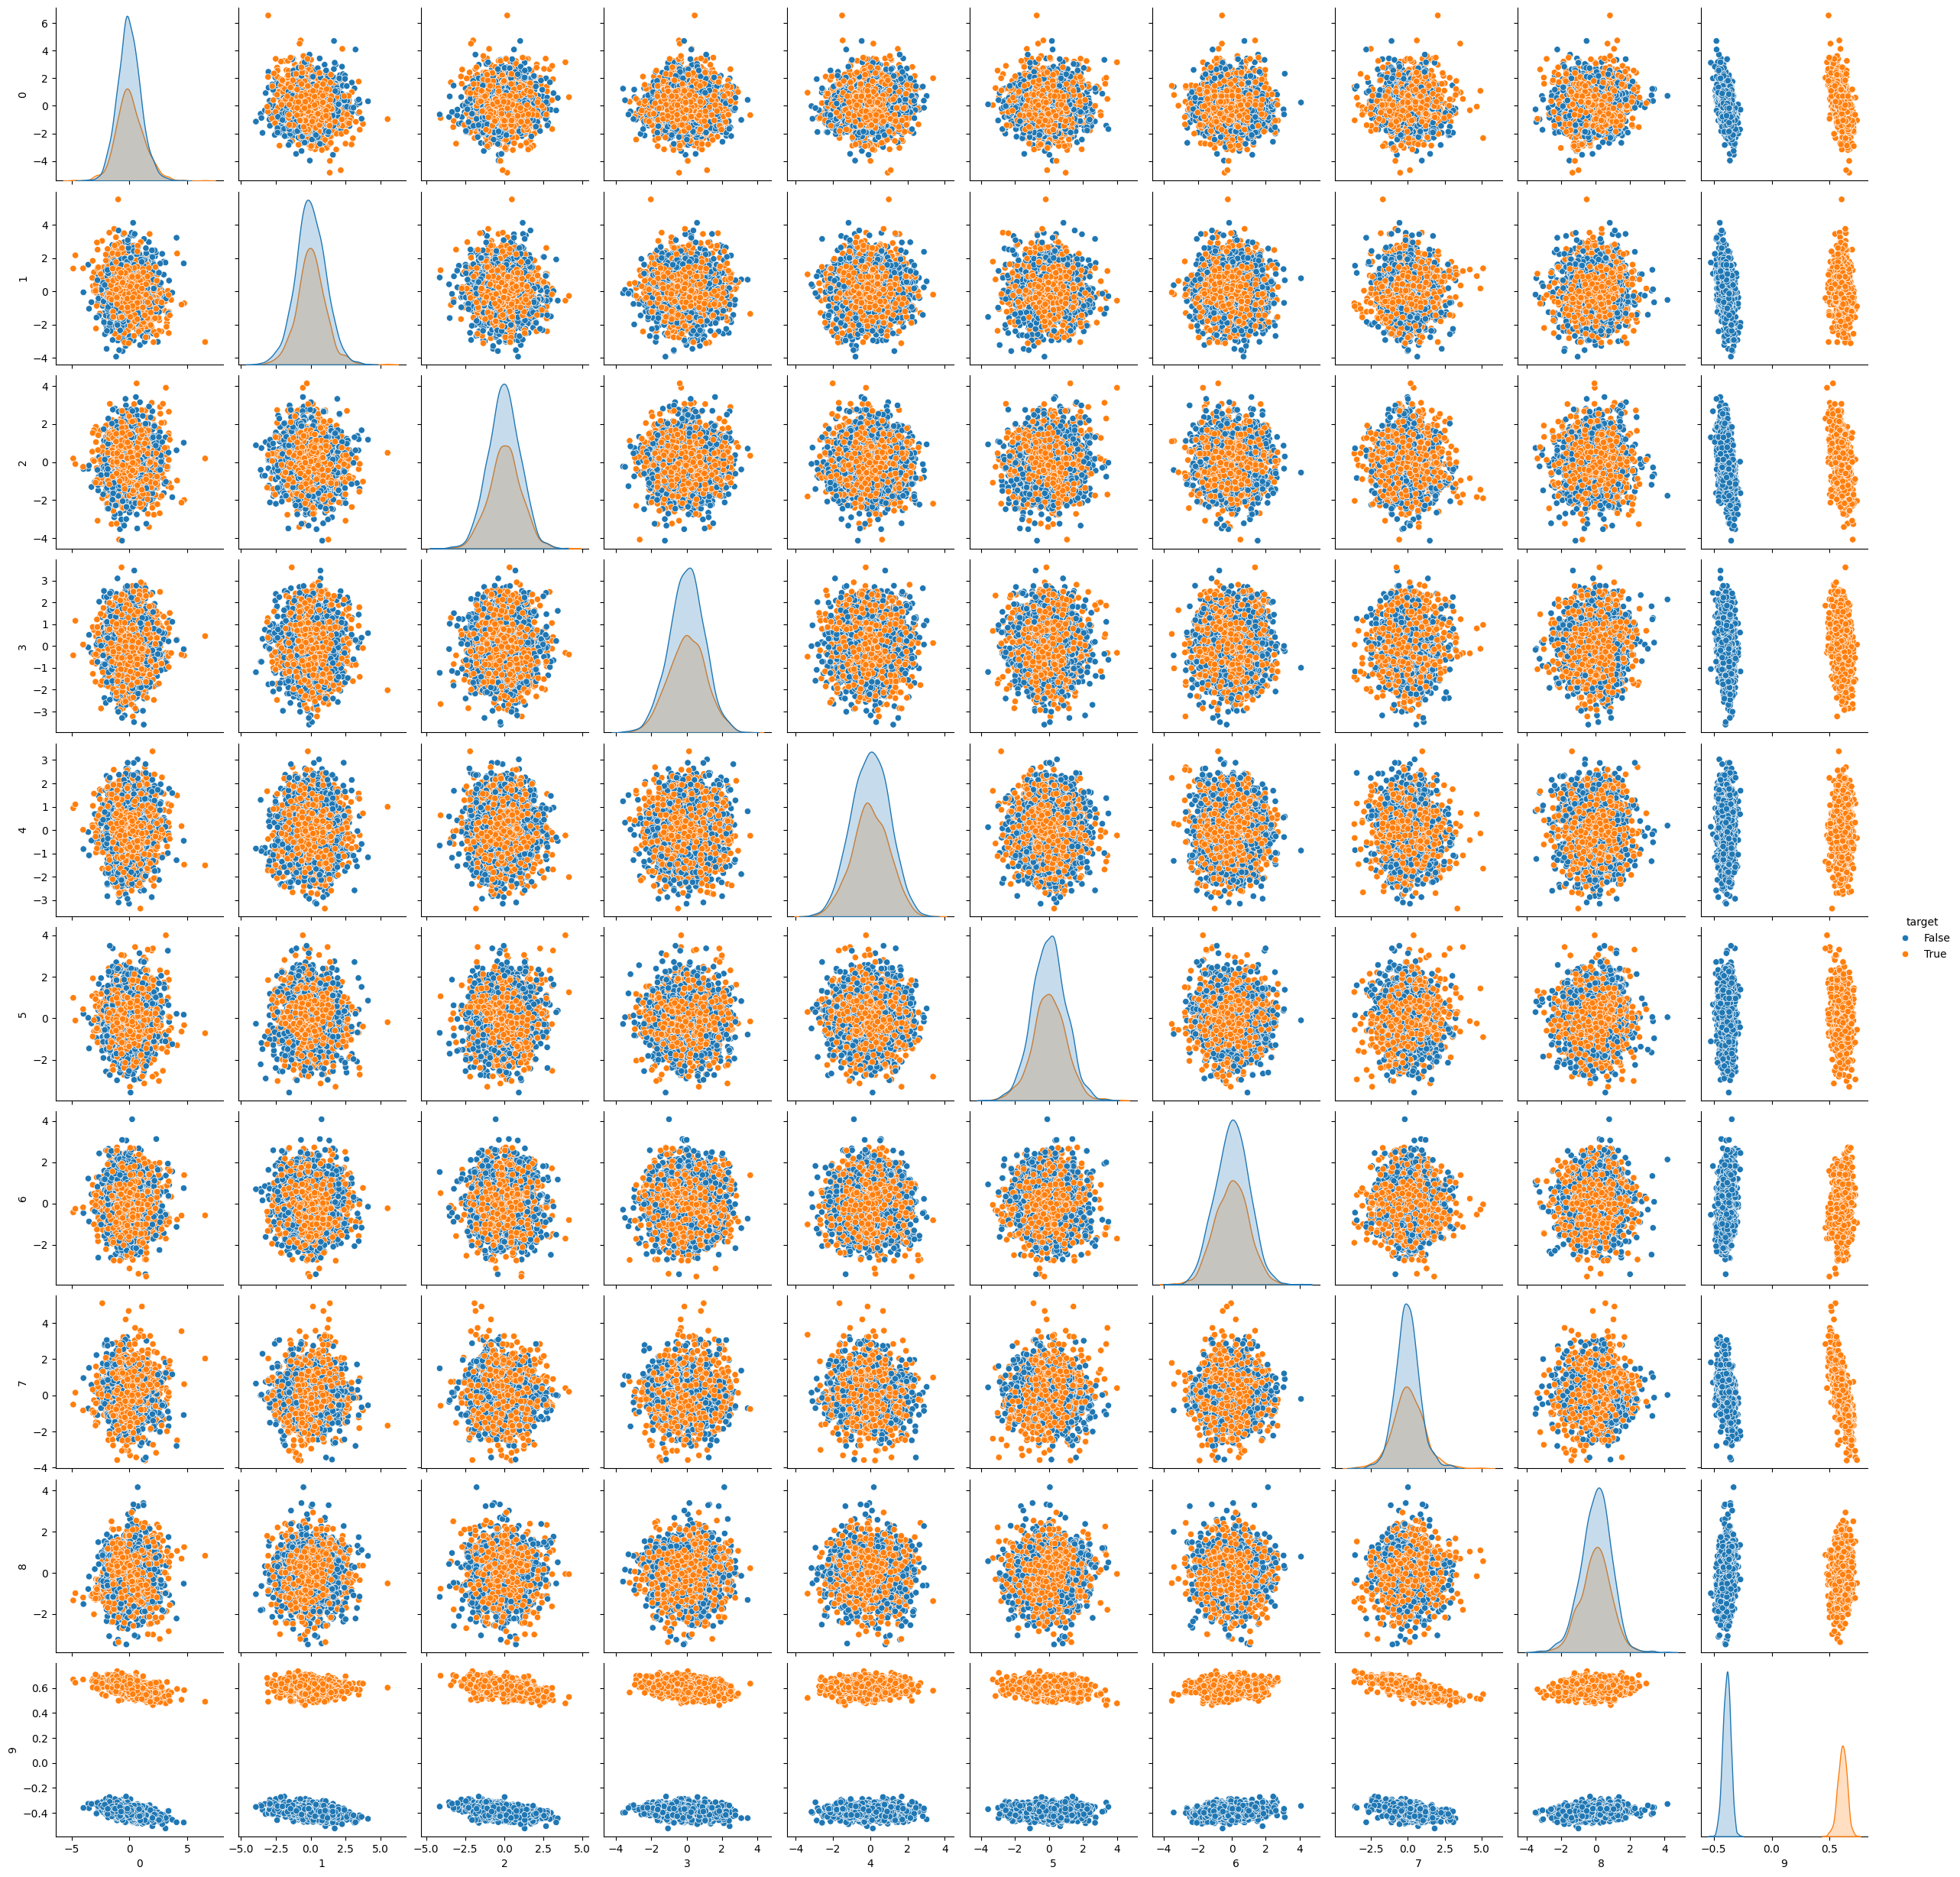

In [ ]:
#Revisamos si el pca salió bien y observamos resultados en el pairplot
plt.figure(figsize =(15,8))
sns.heatmap(pca_df.corr(),annot =True,cmap = 'coolwarm')
plt.show()

sns.pairplot(pca_df, hue='target')




---


# 3) **Modelado**

- Probamos un modelo, para ver su rendimiento y ajuste a los datos que tenemos.




In [ ]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(df_standar, y.astype('bool'), test_size=0.25, random_state=42)

**Random Forest simple**

In [ ]:
#Instanciamos un Clasificador RandomForest, simple sin hiperparámetros.
clf = RandomForestClassifier(max_depth=None, random_state=11)

#Realizamos el entrenamiento sobre los datos de entrenamiento (valga la redundancia)
clf.fit(X_train,y_train)

#Guardamos las prediccions que hace el modelo sobre train
train_pred = clf.predict(X_train)




---
# 4) **Evaluando en train**

- Vamos a evaluar nuestro modelo con la Curva ROC y el AUC ROC, para poder
analizar el rendimiento del clasificador.
- Observaremos la matriz de confusión con el especial interés de minimizar los Falsos positivos.
- A modo de control, también observaremos el accuracy.

---





 --> Creamos una función para visualizar las métricas que nos interesa evaluar y ahorrar bloques de código grandes.

In [ ]:
def metric_calc(model, X_train, y_train):
  # Entrenar el modelo
  model.fit(X_train, y_train)

  # Realizar predicciones en el conjunto de prueba
  y_pred = model.predict(X_train)

  # Calcular la precisión del modelo
  accuracy = accuracy_score(y_train, y_pred)

  #Certeza del modelo, para crear la curva roc
  y_scores = model.predict_proba(X_train)[:, 1]

  # Calcular la curva ROC :)
  fpr, tpr, thresholds = roc_curve(y_train, y_scores)

  # Calcular el área bajo la curva ROC (AUC)
  roc_auc = auc(fpr, tpr)

  # Encontrar coordenadas del punto más cercano al esquinero superior izquierdo (0, 1)
  distancias_al_origen = np.sqrt((1 - tpr)**2 + fpr**2)
  indice_umbral_cercano_al_origen = np.argmin(distancias_al_origen)

  # Obtener el umbral asociado al punto más cercano al esquinero superior izquierdo, para tener una idea.
  umbral_cercano_al_origen = thresholds[indice_umbral_cercano_al_origen]

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Curva ROC')
  plt.scatter(fpr[indice_umbral_cercano_al_origen], tpr[indice_umbral_cercano_al_origen], color='red', label=f'Umbral cercano a (0, 1)')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()
  print(f"Precisión del modelo {model}:", accuracy)
  print(f'Umbral asociado al punto más cercano al esquinero superior izquierdo: {umbral_cercano_al_origen}')
  print('AUC ROC:', roc_auc)
  print('Accuracy en train:', accuracy_score(y_train, model.predict(X_train)))




---


--> Creamos una segunda función, para realizar validaciones cruzadas y visualizar
los outputs que nos interesan

In [ ]:
#Cross validate genérico para ahorrar lineas de código

def validation(model, X_set, y_set):
  cv_results = cross_validate(model, X_set, y_set, cv=4,scoring=('accuracy', 'roc_auc') ,return_train_score=True)

  print("Accuracy Scores as Test:", cv_results['test_accuracy'], ' Score:', np.mean(list(cv_results['test_accuracy']))) #Con "as Test" Se refiere al rendimiento en accuracy que obtuvo cada fold cuando le tocó ser "Test" en la validación
  print("AUC-ROC Scores as Test:", cv_results['test_roc_auc'],' Score:', np.mean(list(cv_results['test_roc_auc'])))  #Con "as Test" Se refiere al rendimiento en roc_auc que obtuvo cada fold cuando le tocó ser "Test" en la validación
  print("Train Accuracy Scores:", cv_results['train_accuracy'], ' Score:', np.mean(list(cv_results['train_accuracy'])))
  print("Train AUC-ROC Scores:", cv_results['train_roc_auc'], ' Score:', np.mean(list(cv_results['train_roc_auc'])))
  print('Diccionario completo:', cv_results)






---



**Evaluamos en Train**

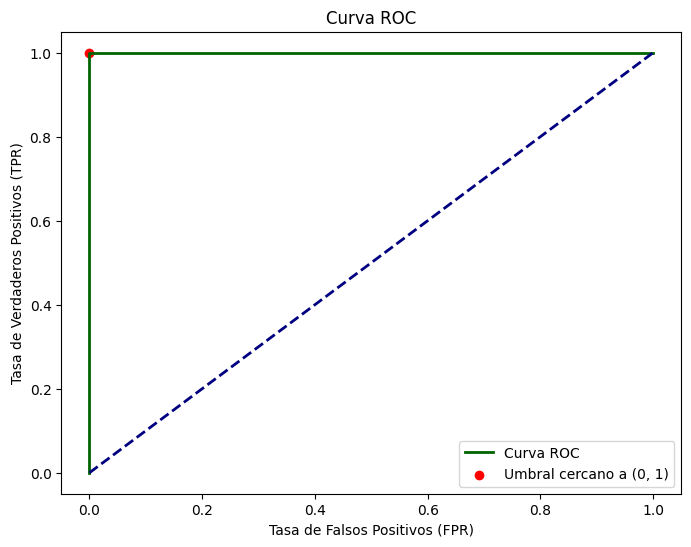

Precisión del modelo RandomForestClassifier(random_state=11): 1.0
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.97
AUC ROC: 1.0
Accuracy en train: 1.0


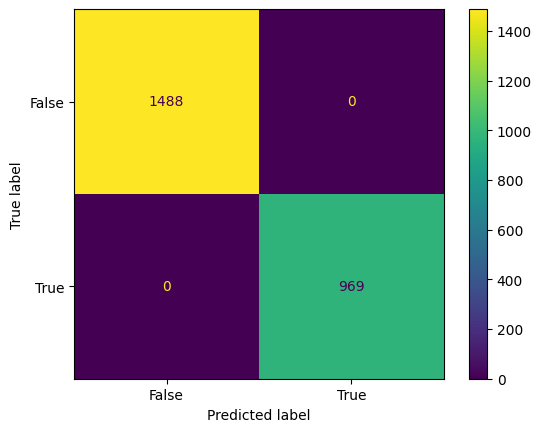

In [ ]:
#Calculamos las métricas que nos interesan
metric_calc(clf, X_train, y_train)

# Matriz de confusión para ver cómo le fue en el entrenamiento
matriz=confusion_matrix(y_train, train_pred)
disp_rforest=ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
disp_rforest

**Validación Cruzada**

In [ ]:
#Validación cruzada
validation(clf, X_train, y_train.astype('bool'))

Accuracy Scores as Test: [1. 1. 1. 1.]  Score: 1.0
AUC-ROC Scores as Test: [1. 1. 1. 1.]  Score: 1.0
Train Accuracy Scores: [1. 1. 1. 1.]  Score: 1.0
Train AUC-ROC Scores: [1. 1. 1. 1.]  Score: 1.0
Diccionario completo: {'fit_time': array([0.512573  , 0.53184986, 0.52188158, 0.35041571]), 'score_time': array([0.05306578, 0.04102397, 0.03135014, 0.03098178]), 'test_accuracy': array([1., 1., 1., 1.]), 'train_accuracy': array([1., 1., 1., 1.]), 'test_roc_auc': array([1., 1., 1., 1.]), 'train_roc_auc': array([1., 1., 1., 1.])}




---

**IMPORTANCIA DE FEATURES**
- Hacemos un análisis de importancia de features para el clasificador, buscando entender cuáles atributos están aportando señal.


In [ ]:
#Indagamos en el algoritmo para ver que atributo está levantando señal

keys = list(dict(dfp.drop('Potability', axis=1)).keys())
#print(len(keys))
idx = pd.DataFrame(X_train,y_train).columns = keys


importancias = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

clf_importances = pd.Series(importancias, index=idx)

fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de features con MDI")
ax.set_ylabel("Mean decrease in impurity (MDI)")
ax.set_xlabel('Features')
fig.tight_layout()

ValueError: Length mismatch: Expected axis has 10 elements, new values have 9 elements

# 5) **Iteración sobre resultados del PCA**

- Repetimos estos pasos sobre el dataset que obtuvimos del pca para analizar resultados basados en metricas.


In [ ]:
# Seteamos x e y nuevos
X_pca = pca.fit_transform(df_standar)

y_pca = dfp['Potability'].astype('bool')

pca_df = pd.DataFrame(X_pca, y_pca)

pca_df

0         1         2         3         4         5  \
Potability                                                               
False      -0.620475  0.012111 -0.035403  1.687479 -1.240454 -0.965218   
False       0.761537  2.395571 -1.883372 -0.090127 -1.095959  0.205179   
False      -0.996372 -0.930317  0.313455  0.732478  0.606098  1.306566   
False      -0.832891 -0.418986  0.472077  1.110556 -0.152153  0.638957   
False      -0.215543 -0.605600 -0.087369 -1.837864  0.058346 -0.409191   
...              ...       ...       ...       ...       ...       ...   
True        2.251723  1.456298 -1.104491  0.097342 -0.276422  0.240968   
True       -1.107615 -0.735348 -0.596628  1.006628  1.355539  0.983532   
True        0.297534 -0.379467 -0.034777  0.769282 -0.038030 -0.788678   
True        0.052452  0.287081  1.454529 -0.516768 -0.720638 -0.620971   
True       -1.062207 -0.774657  0.468180  1.565078  1.702546 -0.214838   

                   6         7         8         9  
Potability                                          
False      -1.238338 -0.677864 -1.002387 -0.395285  
False      -0.732938 -1.200172  1.317833 -0.368378  
False      -0.562209  0.203612 -0.414141 -0.388867  
False       2.423808  0.076747 -0.827186 -0.379266  
False      -1.026236  1.585027  0.951354 -0.398132  
...              ...       ...       ...       ...  
True       -0.239397 -0.598023 -2.172995  0.562540  
True       -0.081510  0.139572  0.441462  0.637832  
True       -0.658726  1.945428 -0.851388  0.550426  
True        0.519640 -1.728868  0.351382  0.634048  
True       -0.173661  0.276704  0.328468  0.615438  

[3276 rows x 10 columns]

In [ ]:
#Train Test Split para la data del pca
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.25, random_state=44)


Random Forest en PCA

In [ ]:
clf.fit(X_train_pca,y_train_pca)

train_pred_pca = clf.predict(X_train_pca)



---
**Evaluamos esta iteración, en los datos de entrenamiento**


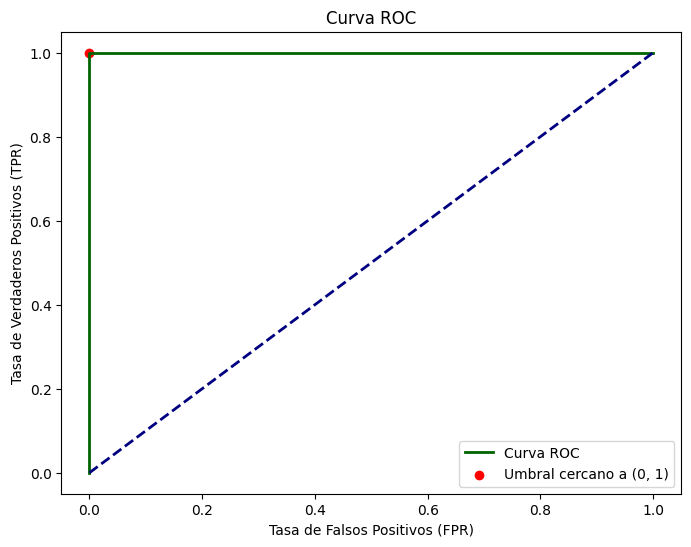

Precisión del modelo RandomForestClassifier(random_state=11): 1.0
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.96
AUC ROC: 1.0
Accuracy en train: 1.0


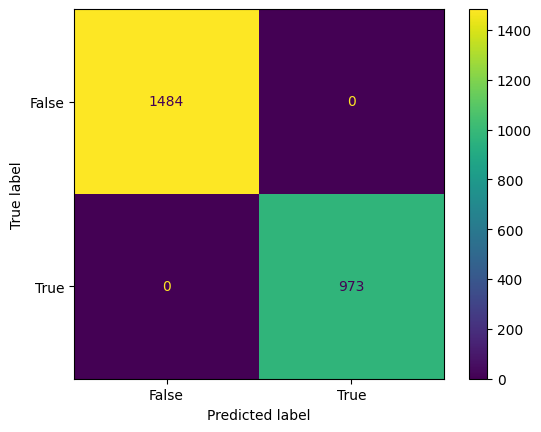

In [ ]:
metric_calc(clf, X_train_pca, y_train_pca)
matriz_pca = confusion_matrix(y_train_pca, train_pred_pca)
disp_pca=ConfusionMatrixDisplay.from_estimator(clf, X_train_pca, y_train_pca)
disp_pca

In [ ]:
validation(clf, X_train_pca, y_train_pca)

Accuracy Scores as Test: [1. 1. 1. 1.]  Score: 1.0
AUC-ROC Scores as Test: [1. 1. 1. 1.]  Score: 1.0
Train Accuracy Scores: [1. 1. 1. 1.]  Score: 1.0
Train AUC-ROC Scores: [1. 1. 1. 1.]  Score: 1.0
Diccionario completo: {'fit_time': array([0.48820853, 0.49415517, 0.45203996, 0.64167261]), 'score_time': array([0.03525281, 0.03537989, 0.03634715, 0.13411403]), 'test_accuracy': array([1., 1., 1., 1.]), 'train_accuracy': array([1., 1., 1., 1.]), 'test_roc_auc': array([1., 1., 1., 1.]), 'train_roc_auc': array([1., 1., 1., 1.])}




---

# 6) **Evaluación en Test**
- Evaluamos el rendimiento en test para nuestro clasificador, para los datos del pca y para los datos originales estandarizados.



In [ ]:
def metric_calc_test(model, X_train, X_test, y_train, y_test):
  # Entrenar el modelo
  model.fit(X_train, y_train)

  # Realizar predicciones en el conjunto de prueba
  y_pred = model.predict(X_test)

  # Calcular la precisión del modelo en test
  accuracy = accuracy_score(y_test, y_pred)

  #Certeza del modelo en test, para crear la curva roc
  y_scores = model.predict_proba(X_test)[:, 1]

  # Calcular la curva ROC en test :)
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)

  # Calcular el área bajo la curva ROC (AUC) en test
  roc_auc = auc(fpr, tpr)

  # Encontrar coordenadas del punto más cercano al esquinero superior izquierdo (0, 1)
  distancias_al_origen = np.sqrt((1 - tpr)**2 + fpr**2)
  indice_umbral_cercano_al_origen = np.argmin(distancias_al_origen)

  # Obtener el umbral asociado al punto más cercano al esquinero superior izquierdo, fines gráficos unicamente.
  umbral_cercano_al_origen = thresholds[indice_umbral_cercano_al_origen]

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Curva ROC del modelo')
  plt.scatter(fpr[indice_umbral_cercano_al_origen], tpr[indice_umbral_cercano_al_origen], color='red', label=f'Umbral cercano a (0, 1)')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()
  print("Precisión del modelo}:", accuracy)
  print(f'Umbral asociado al punto más cercano al esquinero superior izquierdo: {umbral_cercano_al_origen}')
  print('AUC ROC:', roc_auc)
  print('Accuracy en test:', accuracy_score(y_test, model.predict(X_test)))


**Evaluamos Random Forest en test**

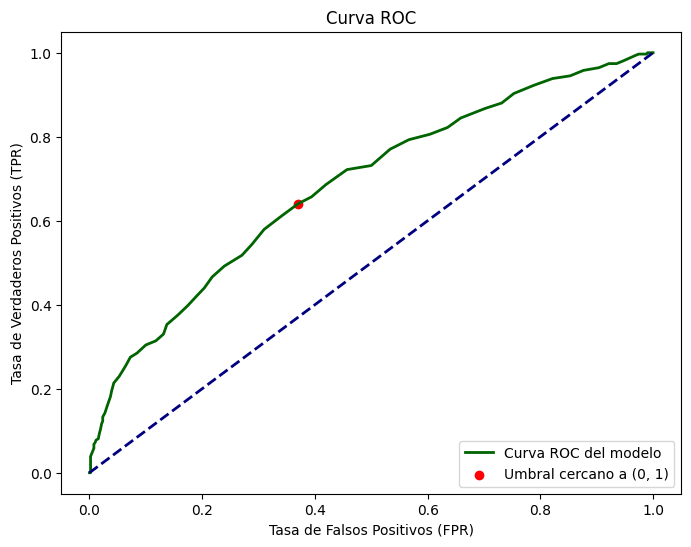

Precisión del modelo}: 0.6654456654456654
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.39
AUC ROC: 0.6830573005901389
Accuracy en test: 0.6654456654456654


In [ ]:
metric_calc_test(clf, X_train, X_test, y_train, y_test)



---
**Evaluamos el desempeño en el conjunto de prueba de los datos del PCA**


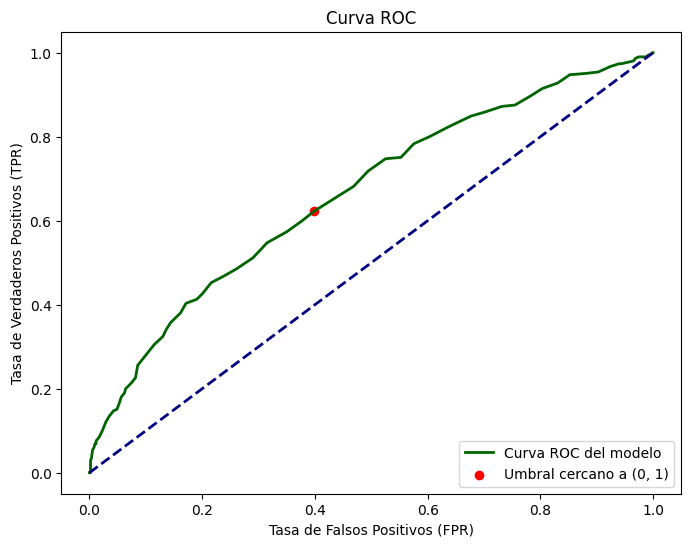

Precisión del modelo}: 0.6678876678876678
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.4
AUC ROC: 0.6629648529693181
Accuracy en test: 0.6678876678876678


In [ ]:
metric_calc_test(clf, X_train_pca, X_test_pca, y_train_pca, y_test_pca)